# Loan Application Status Prediction
### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1726]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1727]:
df = pd.read_csv("loan_prediction.csv")

In [1728]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1729]:
df.shape

(614, 13)

In [1730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1731]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This dataframe contains a lot of null values.So we will use imputation techniques to treat this.

In [1732]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- Applicantincome,CoapplicantIncome is skwed right
- LoanAmount is skewed left
- Credit_History is skewed strongly left .
- Loan_Amount_Term has outlier after 50th percentile

In [1733]:
# Removing irrelevant Features
# has nothing to do with the Loan_Status
df.drop('Loan_ID',axis=1,inplace=True)

In [1734]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- Gender ---
Male      489
Female    112
Name: Gender, dtype: int64
---- Married ---
Yes    398
No     213
Name: Married, dtype: int64
---- Dependents ---
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---- Education ---
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
---- Self_Employed ---
No     500
Yes     82
Name: Self_Employed, dtype: int64
---- ApplicantIncome ---
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
---- CoapplicantIncome ---
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
---- LoanAmount ---
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtyp

- Property_Area  has 3 unique value

## Imputting the Data

In [1735]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [1736]:
iterativeimp = IterativeImputer()

In [1737]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [1738]:
categorical_columns = df.select_dtypes(include = "object").columns
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [1739]:
numerical_columns = df.select_dtypes(exclude = "object").columns
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [1740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [1741]:


# Encode Categorical Columns
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)

In [1742]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [1743]:
df.iloc[:] = iterativeimp.fit_transform(df)

In [1744]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1745]:
import category_encoders as ce

encoder= ce.BinaryEncoder(cols=['Property_Area'])

df = encoder.fit_transform(df)

- null values are treated

In [1746]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_0,Property_Area_1,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,138.15929,360.0,1.0,0,1,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.00000,360.0,1.0,1,0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.00000,360.0,1.0,0,1,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.00000,360.0,1.0,0,1,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.00000,360.0,1.0,0,1,1.0


# checking the Distribution

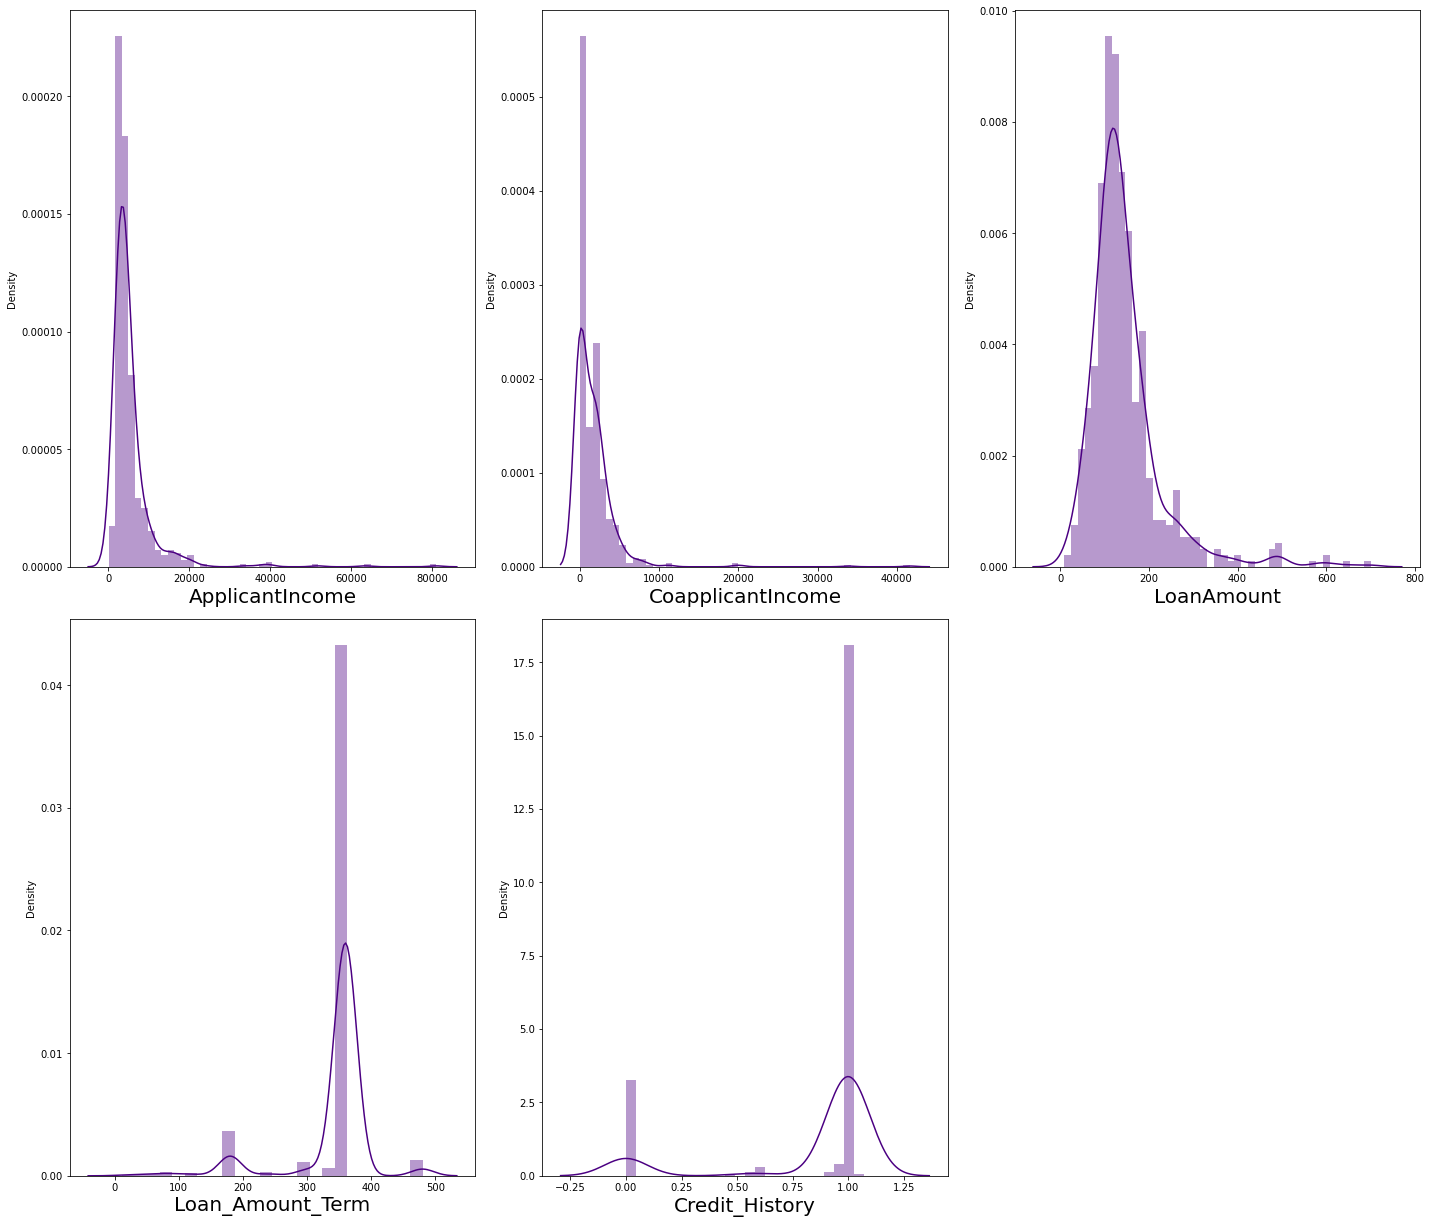

In [1747]:
# Checking how the data has been distributed in each column
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in numerical_columns:
    if plotnumber<=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column], color = 'indigo')
        plt.xlabel(column, fontsize = 20)  
    plotnumber+=1
plt.tight_layout()

From the above distribution plot we can observe

The data is not normally distributed in any of the columns.

The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and which means they are skewed to right.

The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left. We will remove these skewness using appropriate methods in the later part.

## Identifying the outlier

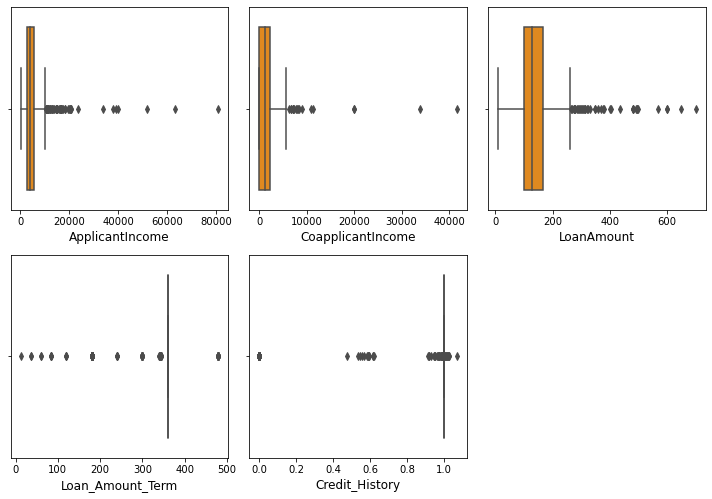

In [1748]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize = (10, 10), facecolor = 'white')
plotnumber = 1
for column in numerical_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[column], color = 'darkorange')
        plt.xlabel(column, fontsize = 12)
        
    plotnumber += 1
    
plt.tight_layout()

As we can see there are all the features have outliers present.

There are a lot of useful information in the outliers

## Zscore method 

In [1749]:
# Numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
from scipy.stats import zscore
z = np.abs(zscore(features))
z
#features['ApplicantIncome']

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.096047,0.279663
1,0.134412,0.038732,0.216680,0.279663
2,0.393747,0.554487,0.952878,0.279663
3,0.462062,0.251980,0.311674,0.279663
4,0.097728,0.554487,0.062316,0.279663
...,...,...,...,...
609,0.410130,0.554487,0.893507,0.279663
610,0.212557,0.554487,1.261606,2.518816
611,0.437174,0.472404,1.267589,0.279663
612,0.357064,0.554487,0.483895,0.279663


In [1750]:
# Creating new dataframe
new_df = df[(z<3).all(axis = 1)]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_0,Property_Area_1,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,138.15929,360.0,1.0,0,1,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.00000,360.0,1.0,1,0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.00000,360.0,1.0,0,1,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.00000,360.0,1.0,0,1,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.00000,360.0,1.0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.00000,360.0,1.0,1,0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.00000,180.0,1.0,1,0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.00000,360.0,1.0,0,1,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.00000,360.0,1.0,0,1,1.0


In [1751]:
new_df.shape

(577, 13)

In [1752]:
df.shape

(614, 13)

In [1753]:
(614-577)/614*100

6.026058631921824

We can afford to loose 6 percent of the data.

## Removing Skewness

- Credit_History is a binary feature so we will not transform it

In [1754]:
# Removing skewness using yeo-johnson method
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [1755]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.177805,0.142283
1,0.234783,0.744117,-0.007978,0.142283
2,-0.527201,-1.122446,-1.435892,0.142283
3,-0.791972,0.895786,-0.161343,0.142283
4,0.728848,-1.122446,0.228109,0.142283


In [1756]:
new_df[numerical_columns].skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.045673
Loan_Amount_Term     0.718900
Credit_History      -1.885336
dtype: float64

Skewness has been removed

# checking the distribution now


Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000001E1B9C9A3A0>
Traceback (most recent call last):
  File "D:\Users\avina\anaconda3_new\lib\weakref.py", line 57, in _cb
    self = self_wr()
KeyboardInterrupt: 


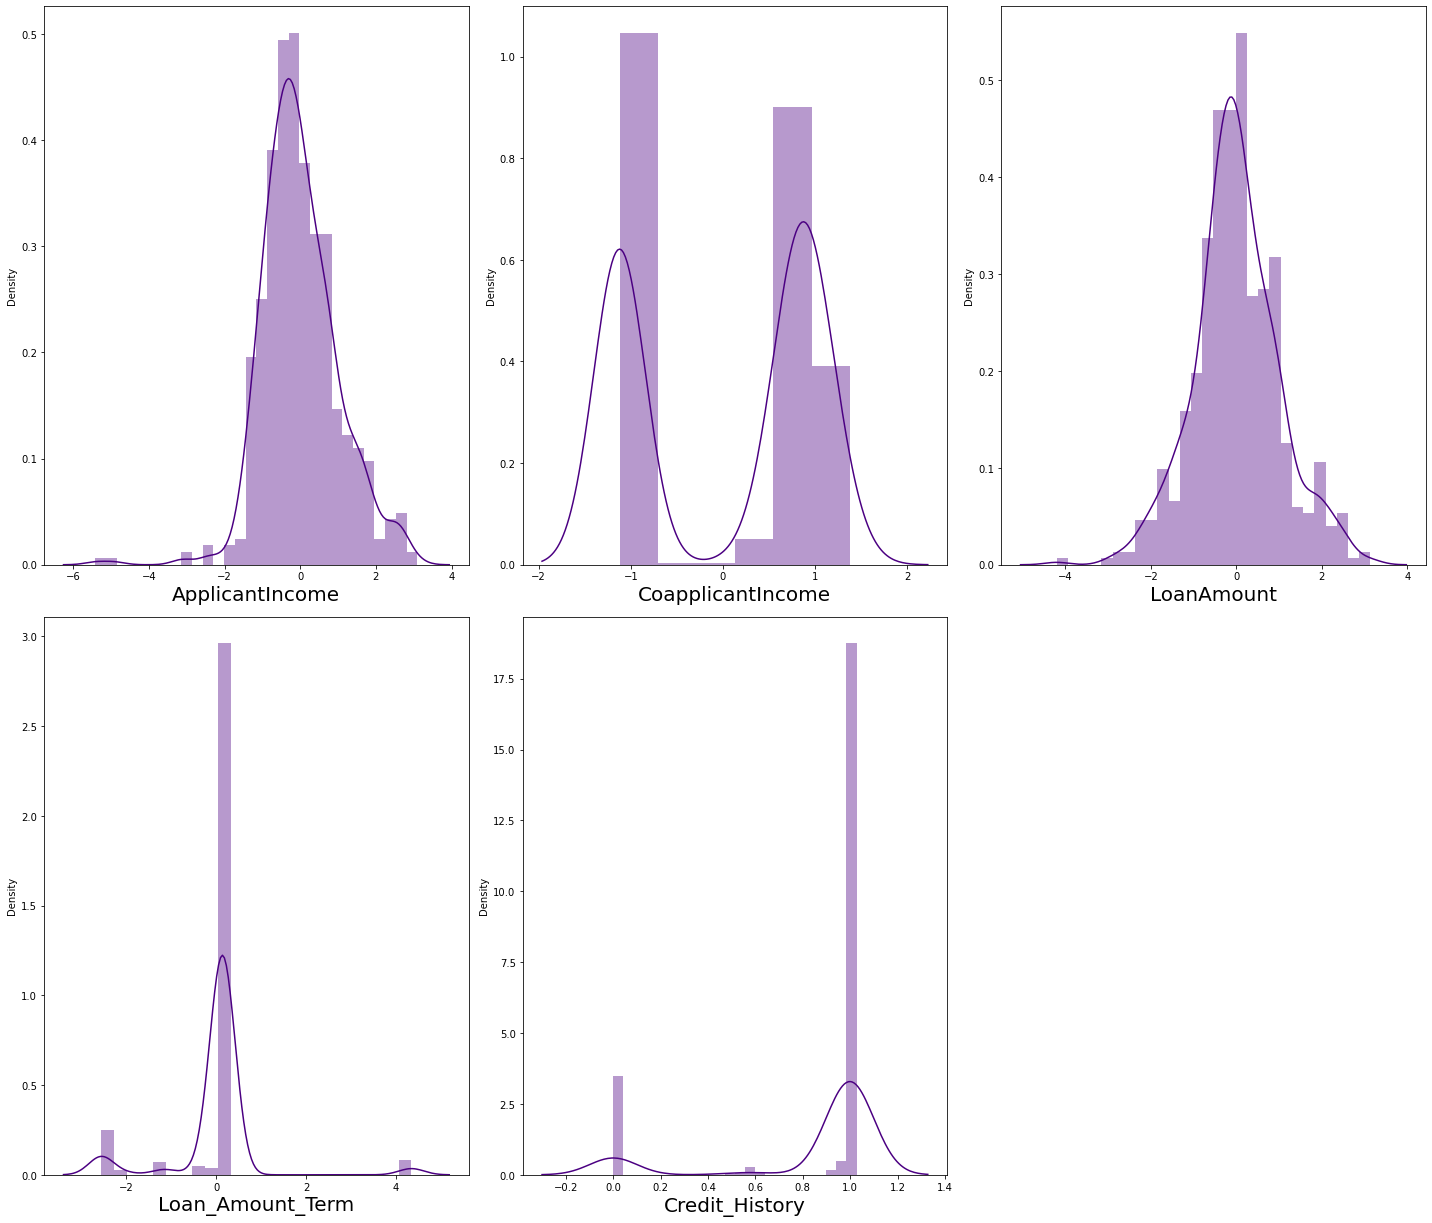

In [1757]:

# Checking how the data has been distributed in each column
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in numerical_columns:
    if plotnumber<=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(new_df[column], color = 'indigo')
        plt.xlabel(column, fontsize = 20)  
    plotnumber+=1
plt.tight_layout()

The data is almost normal also we have removed the skewness that we can notice in the above dist plot.

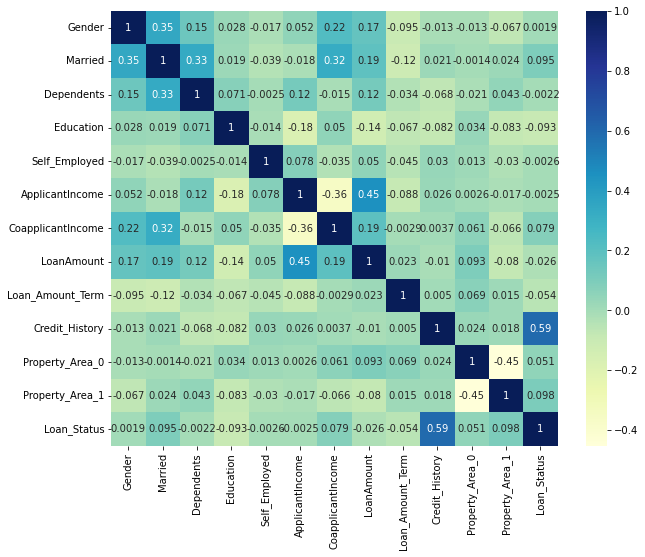

In [1758]:
import seaborn as sns

plt.figure(figsize = (10, 8))  
# plotting correlation heatmap
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)


In [1759]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [1760]:
corr_features = correlation(new_df, 0.7)
len(set(corr_features))

0

- No Two features are highly coorelated

In [1761]:
new_df[cat_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area_0,Property_Area_1
0,1.0,0.0,0.0,0.0,0.0,0,1
1,1.0,1.0,1.0,0.0,0.0,1,0
2,1.0,1.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,1.0,0.0,0,1
4,1.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1,0
610,1.0,1.0,3.0,0.0,0.0,1,0
611,1.0,1.0,1.0,0.0,0.0,0,1
612,1.0,1.0,2.0,0.0,0.0,0,1


In [1762]:
new_df.skew()

Gender              -0.991250
Married             -0.517759
Dependents           1.134133
Education            1.306588
Self_Employed        2.274082
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.045673
Loan_Amount_Term     0.718900
Credit_History      -1.885336
Property_Area_0     -0.736780
Property_Area_1     -0.894207
Loan_Status         -0.822635
dtype: float64

In [1763]:
new_df = new_df.dropna().reset_index(drop=True)

# Splitting the Dependent and Independent Data

In [1764]:
X = new_df.iloc[:,:-1]
#y = new_df[:]
y = new_df.iloc[:,-1:]

In [1765]:
X.shape

(577, 12)

In [1766]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_0,Property_Area_1
0,1.0,0.0,0.0,0.0,0.0,0.681780,-1.122446,0.177805,0.142283,1.0,0,1
1,1.0,1.0,1.0,0.0,0.0,0.234783,0.744117,-0.007978,0.142283,1.0,1,0
2,1.0,1.0,0.0,0.0,1.0,-0.527201,-1.122446,-1.435892,0.142283,1.0,0,1
3,1.0,1.0,0.0,1.0,0.0,-0.791972,0.895786,-0.161343,0.142283,1.0,0,1
4,1.0,0.0,0.0,0.0,0.0,0.728848,-1.122446,0.228109,0.142283,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.0,0.0,0.0,0.0,0.0,-0.587375,-1.122446,-1.293505,0.142283,1.0,1,0
573,1.0,1.0,3.0,0.0,0.0,0.035386,-1.122446,-2.323223,-2.559394,1.0,1,0
574,1.0,1.0,1.0,0.0,0.0,1.281658,0.173344,1.827191,0.142283,1.0,0,1
575,1.0,1.0,2.0,0.0,0.0,1.164426,-1.122446,0.962002,0.142283,1.0,0,1


In [1768]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area_0      0
Property_Area_1      0
dtype: int64

In [1769]:
new_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area_0      0
Property_Area_1      0
Loan_Status          0
dtype: int64

## Feature Scaling using Standard Scaler


In [1770]:
# Excluding other columns because they have binary data
transform_numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

In [1771]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[transform_numerical_columns] = pd.DataFrame(scaler.fit_transform(X[transform_numerical_columns]), columns = X[transform_numerical_columns].columns)


In [1772]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area_0      0
Property_Area_1      0
dtype: int64

In [1773]:
X.skew()

Gender              -0.991250
Married             -0.517759
Dependents           1.134133
Education            1.306588
Self_Employed        2.274082
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.045673
Loan_Amount_Term     0.718900
Credit_History      -1.885336
Property_Area_0     -0.736780
Property_Area_1     -0.894207
dtype: float64

In [1774]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1,stratify = y)


In [1775]:
X_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area_0      0
Property_Area_1      0
dtype: int64

In [1776]:
y.value_counts()

Loan_Status
1.0            398
0.0            179
dtype: int64

# Treating the Imbalanced Dataset

In [1777]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_train, y_train = SM.fit_resample(X_train, y_train)
#X_test, y_test = SM.fit_resample(X_test, y_test)

In [1778]:
y_train.value_counts()

Loan_Status
0.0            266
1.0            266
dtype: int64

In [1779]:
y_test.value_counts()

Loan_Status
1.0            132
0.0             59
dtype: int64

## Modelling

In [1780]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score

In [1781]:
# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
predDTC = DTC.predict(X_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.774869109947644
[[ 37  22]
 [ 21 111]]
              precision    recall  f1-score   support

         0.0       0.64      0.63      0.63        59
         1.0       0.83      0.84      0.84       132

    accuracy                           0.77       191
   macro avg       0.74      0.73      0.74       191
weighted avg       0.77      0.77      0.77       191



In [1782]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC = RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8219895287958116
[[ 37  22]
 [ 12 120]]
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69        59
         1.0       0.85      0.91      0.88       132

    accuracy                           0.82       191
   macro avg       0.80      0.77      0.78       191
weighted avg       0.82      0.82      0.82       191



In [1783]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7958115183246073
[[ 35  24]
 [ 15 117]]
              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64        59
         1.0       0.83      0.89      0.86       132

    accuracy                           0.80       191
   macro avg       0.76      0.74      0.75       191
weighted avg       0.79      0.80      0.79       191



In [1784]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8115183246073299
[[ 33  26]
 [ 10 122]]
              precision    recall  f1-score   support

         0.0       0.77      0.56      0.65        59
         1.0       0.82      0.92      0.87       132

    accuracy                           0.81       191
   macro avg       0.80      0.74      0.76       191
weighted avg       0.81      0.81      0.80       191



In [1785]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7120418848167539
[[ 34  25]
 [ 30 102]]
              precision    recall  f1-score   support

         0.0       0.53      0.58      0.55        59
         1.0       0.80      0.77      0.79       132

    accuracy                           0.71       191
   macro avg       0.67      0.67      0.67       191
weighted avg       0.72      0.71      0.72       191



In [1786]:
# Checking accuracy for GradientBoosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
predGB = GB.predict(X_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8272251308900523
[[ 38  21]
 [ 12 120]]
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.70        59
         1.0       0.85      0.91      0.88       132

    accuracy                           0.83       191
   macro avg       0.81      0.78      0.79       191
weighted avg       0.82      0.83      0.82       191



In [1787]:
# Checking accuracy for AdaBoost Classifier
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)
predADA = ADA.predict(X_test)
print(accuracy_score(y_test, predADA))
print(confusion_matrix(y_test, predADA))
print(classification_report(y_test, predADA))

0.8272251308900523
[[ 37  22]
 [ 11 121]]
              precision    recall  f1-score   support

         0.0       0.77      0.63      0.69        59
         1.0       0.85      0.92      0.88       132

    accuracy                           0.83       191
   macro avg       0.81      0.77      0.79       191
weighted avg       0.82      0.83      0.82       191



## Checking the Cross Validation Score


In [1788]:
from sklearn.model_selection import cross_val_score


In [1789]:
# CV score for Decision Tree Classifier
print(cross_val_score(DTC, X, y, cv = 5).mean())

0.7383958020989505


In [1790]:
# CV score for Random Forest Classifier
print(cross_val_score(RFC, X, y, cv = 5).mean())

0.833688155922039


In [1791]:
# CV score for Logistic Regression Classifier
print(cross_val_score(LR, X, y, cv = 5).mean())

0.8319490254872564


In [1792]:
# CV score for Support Vector Machine Classifier
print(cross_val_score(svc, X, y, cv = 5).mean())

0.8163418290854573


In [1793]:
# CV score for KNN Classifier
print(cross_val_score(knn, X, y, cv = 5).mean())

0.734887556221889


In [1794]:
# Cv score for Gradient Boosting Classifier
print(cross_val_score(GB, X, y, cv = 5).mean())

0.811184407796102


In [1795]:
# CV score for AdaBoosting Classifier
print(cross_val_score(ADA, X, y, cv = 5).mean())

0.8059970014992504


We will go with SVC as it has least difference between test_score and accuracy.

## Hyper Parameter Tuning


In [1796]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [1797]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
"""param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
"""
"""                
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
"""
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

 
grid = GridSearchCV(LR, param_grid, cv=5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [1798]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [1799]:

 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

LogisticRegression(C=0.615848211066026, max_iter=1000, penalty='l1',
                   solver='saga')


In [1807]:
Loan = LogisticRegression(C=0.615848211066026,max_iter=1000, penalty='l1', solver='saga',)
Loan.fit(X_train, y_train)
pred = Loan.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

79.58115183246073


## Plotting ROC and compare AUC for all the models used

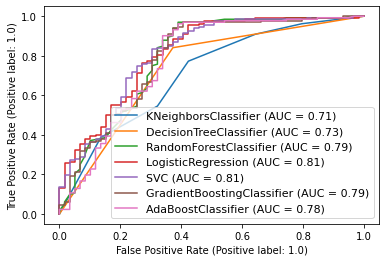

In [1801]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(knn,X_test, y_test)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ADA, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

## Plotting ROC and Compare AUC for the best model LogisticRegression


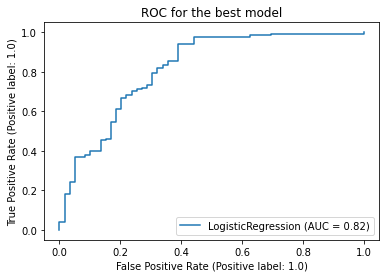

In [1802]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(Loan, X_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving the Model

In [1803]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan, "Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

## Predicting the saved model


In [1804]:
# Loading the saved model
model = joblib.load("Loan_Application_Status.pkl")

In [1821]:
a = np.array(y_test).flatten()
predicted = np.array(model.predict(X_test))
df_final = pd.DataFrame({'Original' : a, 'Predicted' : predicted}, index = range(len(a)))
df_final

,Original,Predicted
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
186,1.0,1.0
187,1.0,1.0
188,1.0,1.0
189,1.0,1.0


In [1824]:
print(confusion_matrix(a, predicted))
print(classification_report(a, predicted))

[[ 33  26]
 [  8 124]]
              precision    recall  f1-score   support

         0.0       0.80      0.56      0.66        59
         1.0       0.83      0.94      0.88       132

    accuracy                           0.82       191
   macro avg       0.82      0.75      0.77       191
weighted avg       0.82      0.82      0.81       191



In [ ]:
df_final